In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [4]:
df = pd.read_csv('campaign_responses.csv', header=0)
df.head()

,customer_id,age,gender,annual_income,credit_score,employed,marital_status,no_of_children,responded
0,1,35,Male,65000,720,Yes,Married,2,Yes
1,2,28,Female,45000,680,No,Single,0,No
2,3,42,Male,85000,750,Yes,Married,3,Yes
3,4,31,Female,55000,710,Yes,Single,1,No
4,5,47,Male,95000,790,Yes,Married,2,Yes


In [5]:
# Convert each column with nominal data to numbers from 0, 1, 2...
df["gender"], _ = pd.factorize(df["gender"])
df["marital_status"], _ = pd.factorize(df["marital_status"])
df["employed"], _ = pd.factorize(df["employed"])

# Remove not needed columns
df = df.drop('customer_id', axis=1)

df.head()

,age,gender,annual_income,credit_score,employed,marital_status,no_of_children,responded
0,35,0,65000,720,0,0,2,Yes
1,28,1,45000,680,1,1,0,No
2,42,0,85000,750,0,0,3,Yes
3,31,1,55000,710,0,1,1,No
4,47,0,95000,790,0,0,2,Yes


In [6]:
# Create a map using the unique values array above.
mapping = {
   'No': 0,
   'Yes': 1,
}

# Replace the values
df['responded'] = df['responded'].replace(mapping)
df.head()

,age,gender,annual_income,credit_score,employed,marital_status,no_of_children,responded
0,35,0,65000,720,0,0,2,1
1,28,1,45000,680,1,1,0,0
2,42,0,85000,750,0,0,3,1
3,31,1,55000,710,0,1,1,0
4,47,0,95000,790,0,0,2,1


In [7]:
header = df.columns
header

Index(['age', 'gender', 'annual_income', 'credit_score', 'employed',
       'marital_status', 'no_of_children', 'responded'],
      dtype='object')

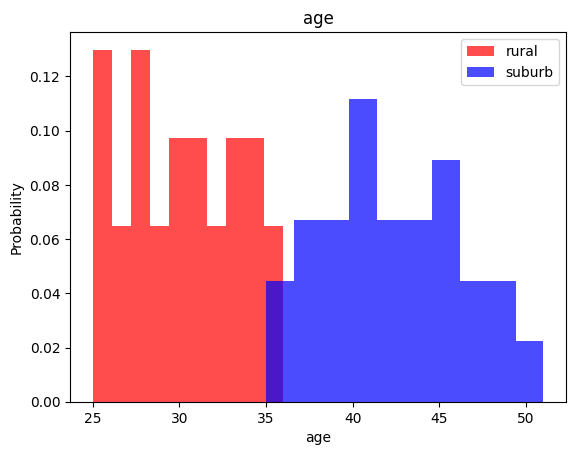

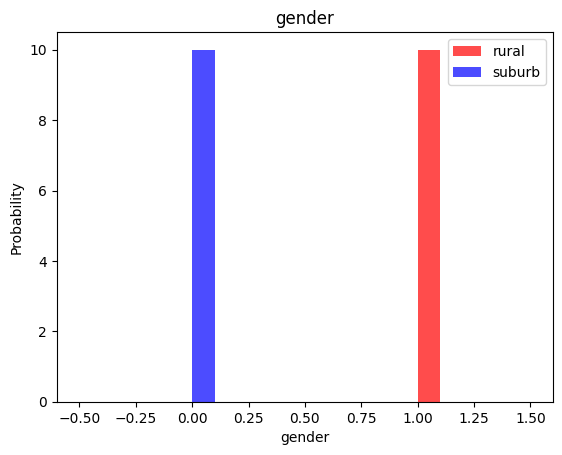

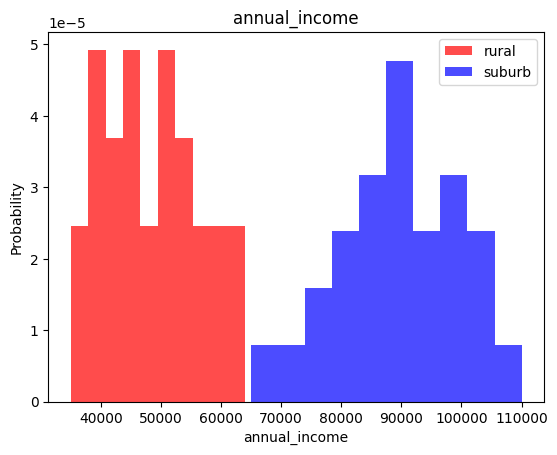

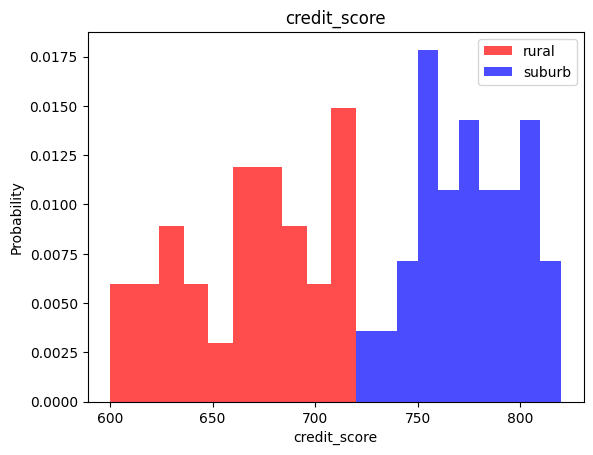

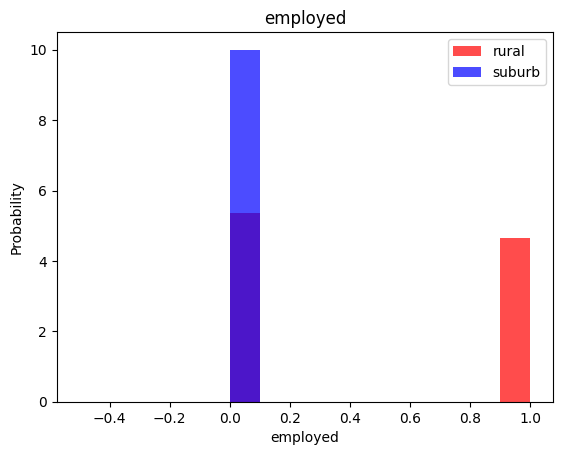

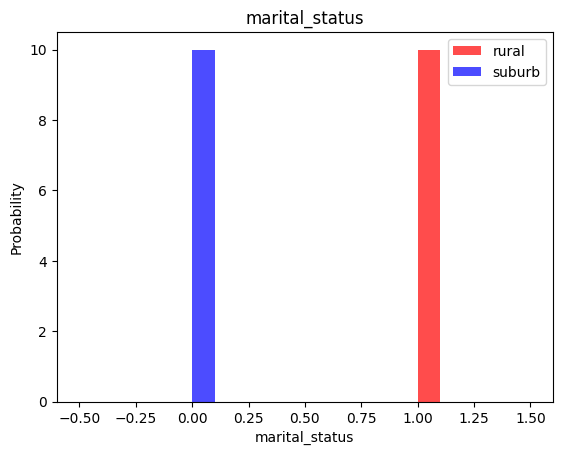

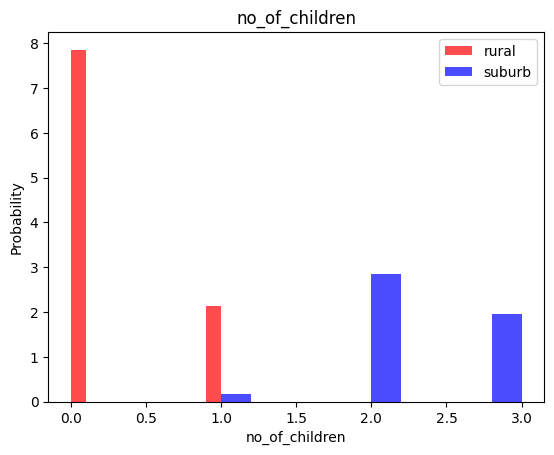

In [8]:
# We plot a histogram to check which features affect the outcome the most or the least
# This helps us determine, which features to use in training our model and the ones to discard

for label in header[:-1]:
  plt.hist(df[df['responded'] == 0][label], color = 'red', label='rural', alpha=0.7, density=True)
  plt.hist(df[df['responded'] == 1][label], color = 'blue', label='suburb', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [9]:
train, test = np.split(df.sample(frac=1), [int(0.8 *len(df))])

In [10]:
# Scale dataset so better prediction can be made.
def scale_dataset(dataframe, oversample=False):
  # This selects all columns in the DataFrame except the last one as the features.
  X = dataframe[dataframe.columns[:-1]].values

  # This selects the last column in the DataFrame as the target.
  y = dataframe[dataframe.columns[-1]].values

  # This removes the mean and scaling to unit variance
  # Known as standardization. Basically removes outliers.
  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  """
    Make both x and y sets equal sets as appropriate.

    RandomOverSampler is important in cases where there is alot more features vector of a
    specific output. 
    
    Example if you have a dataset with 100 rows with output as "Yes" and 20
    rows with "No". 
    You can see that our datasets would be biased towards the output with "Yes".
    To solve this, RandomOverSampler strategically duplicates rows with "No" so the dataset ends up
    having 100 rows with "Yes" and 100 with "No" outputs.

    This is called over-sampling.
  """
  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  # Stack horizontally
  # Reshape y and concatenate it with X
  # This simply means attaching each feature vector with the appropriate output.
  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [11]:
train, X_train, y_train = scale_dataset(train, oversample=True)

# test sets are not oversampled because they
# are used to test new data
test, X_test, y_test = scale_dataset(test, oversample=False)

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [14]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [15]:
y_pred = svm_model.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1])

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         7

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

